# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe() # std, mean'den büyükse outlier filan cok oluyor demek..

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [7]:
df.shape

(103, 10)

In [8]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [9]:
df["Cement"].value_counts()

159.000    4
145.000    3
140.000    3
320.000    2
160.000    2
          ..
163.000    1
342.000    1
356.000    1
309.000    1
348.700    1
Name: Cement, Length: 80, dtype: int64

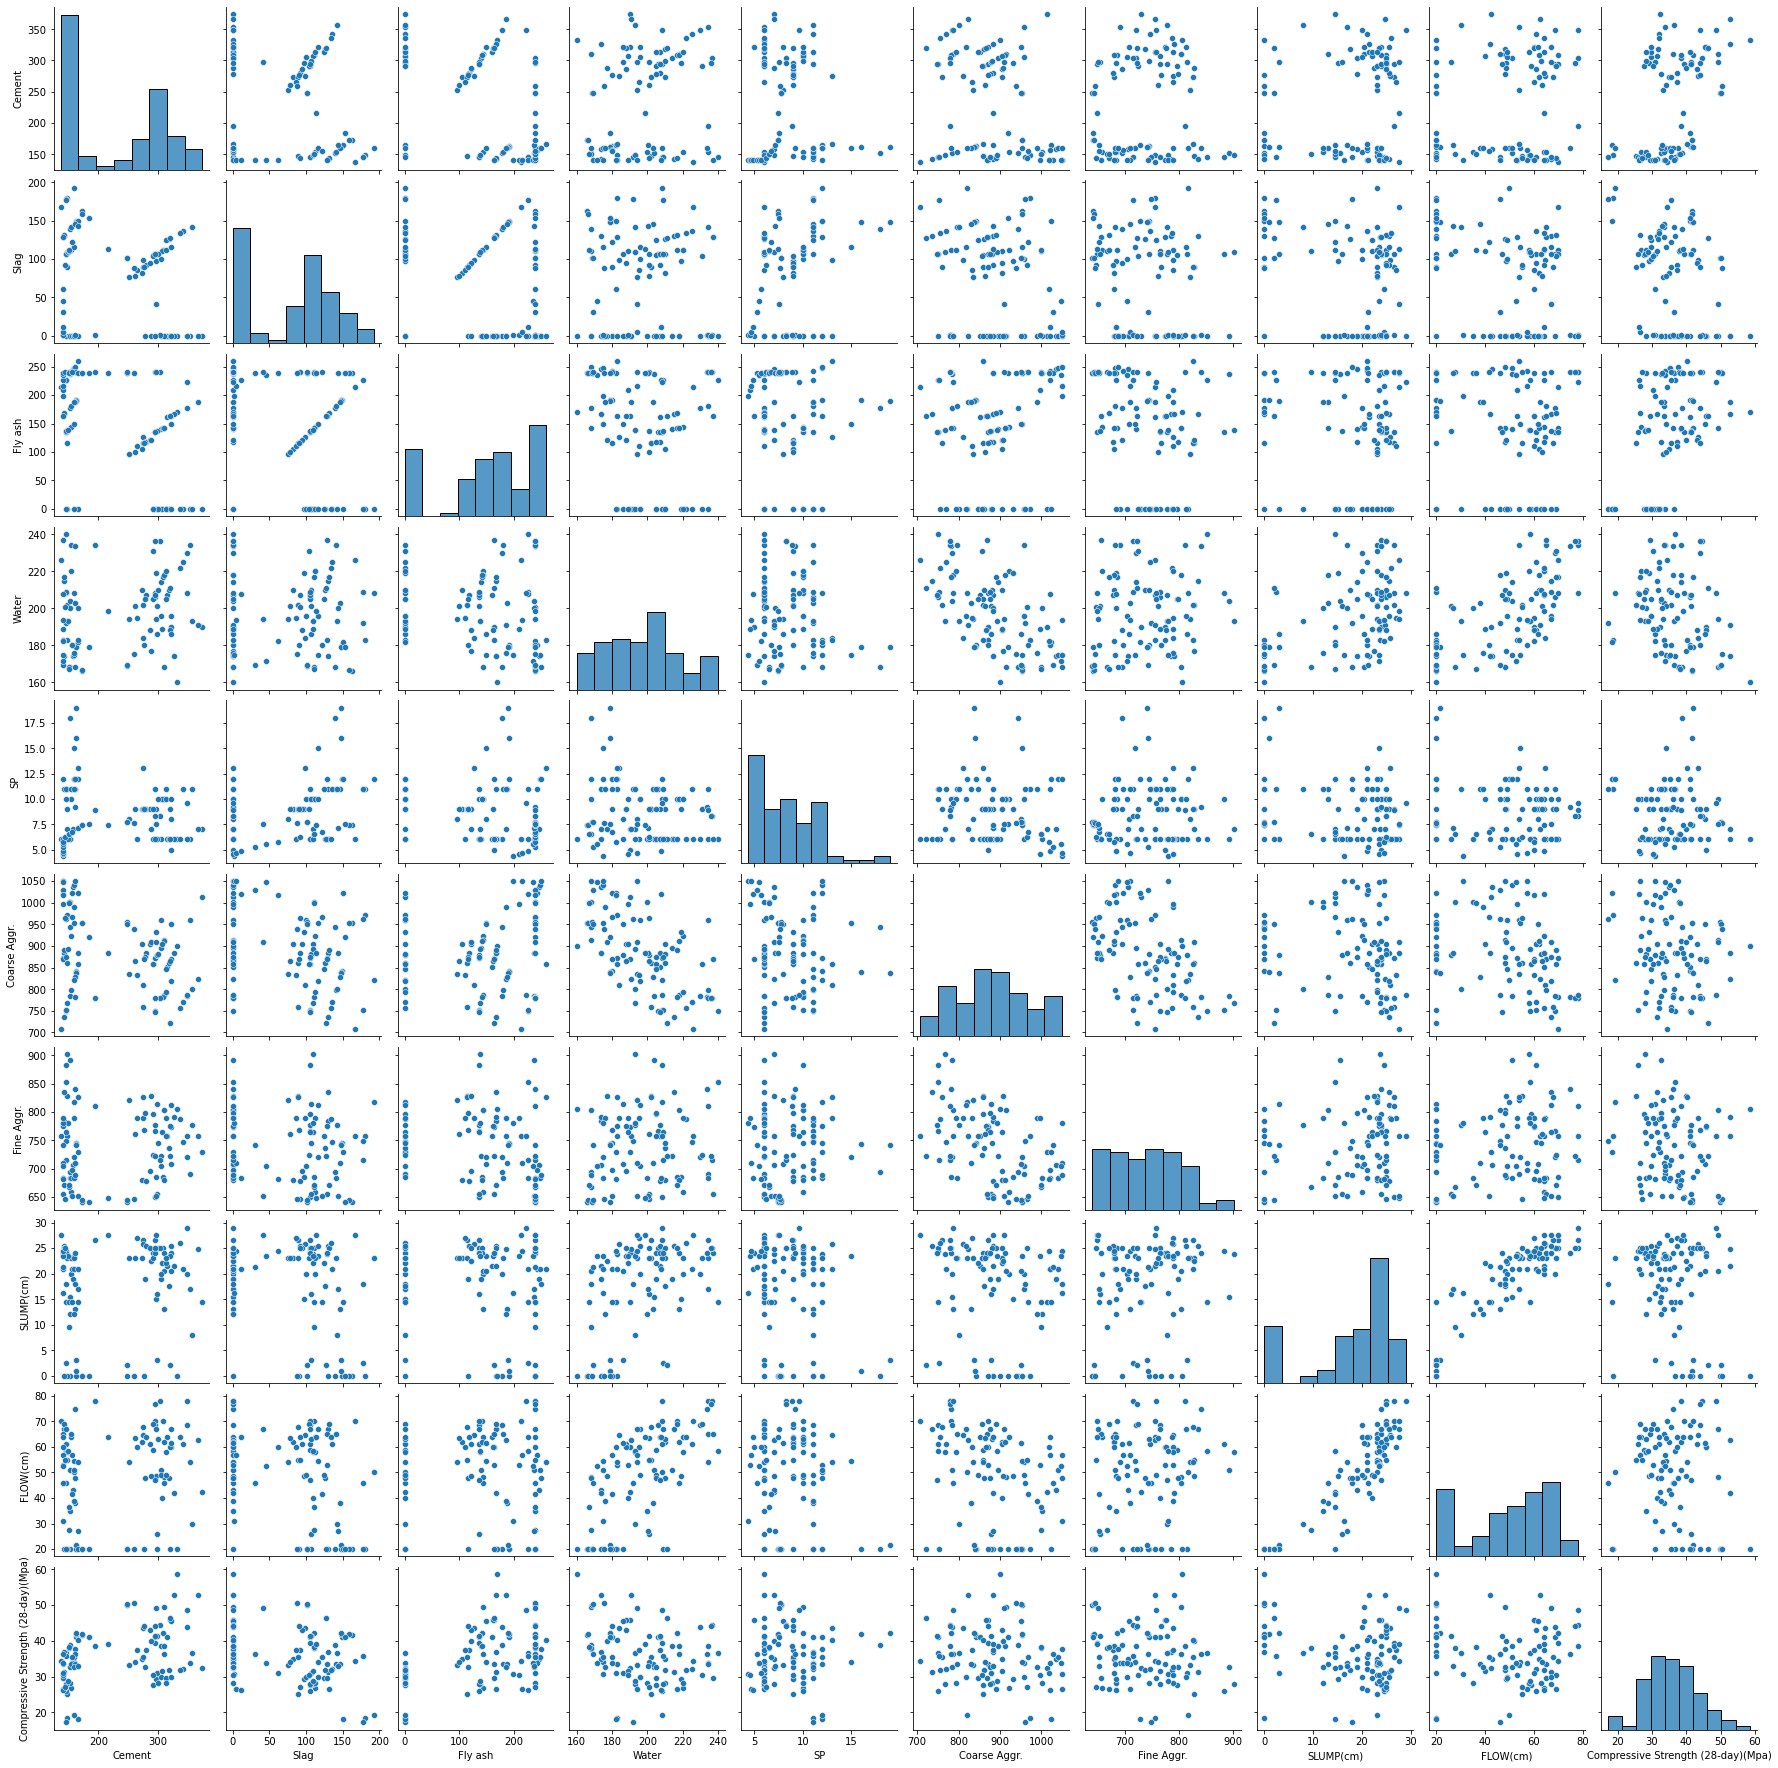

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [12]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

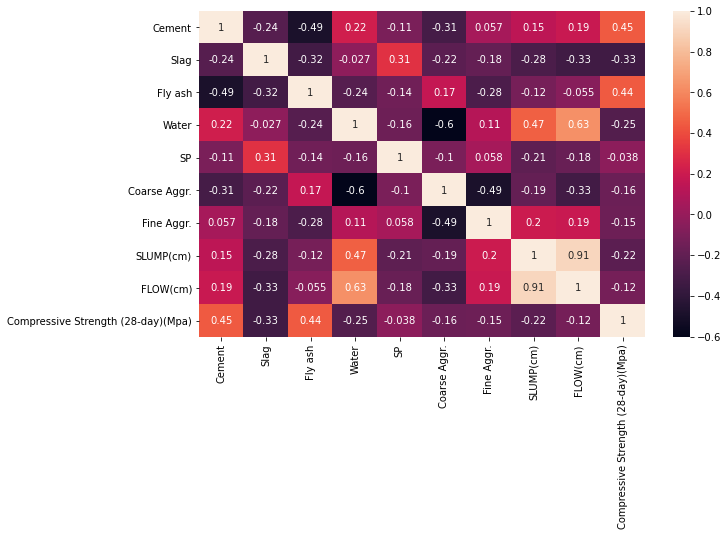

In [13]:
sns.heatmap(df.corr(), annot= True) # 0.91'in oldugu yerde multicollinearity

<AxesSubplot:>

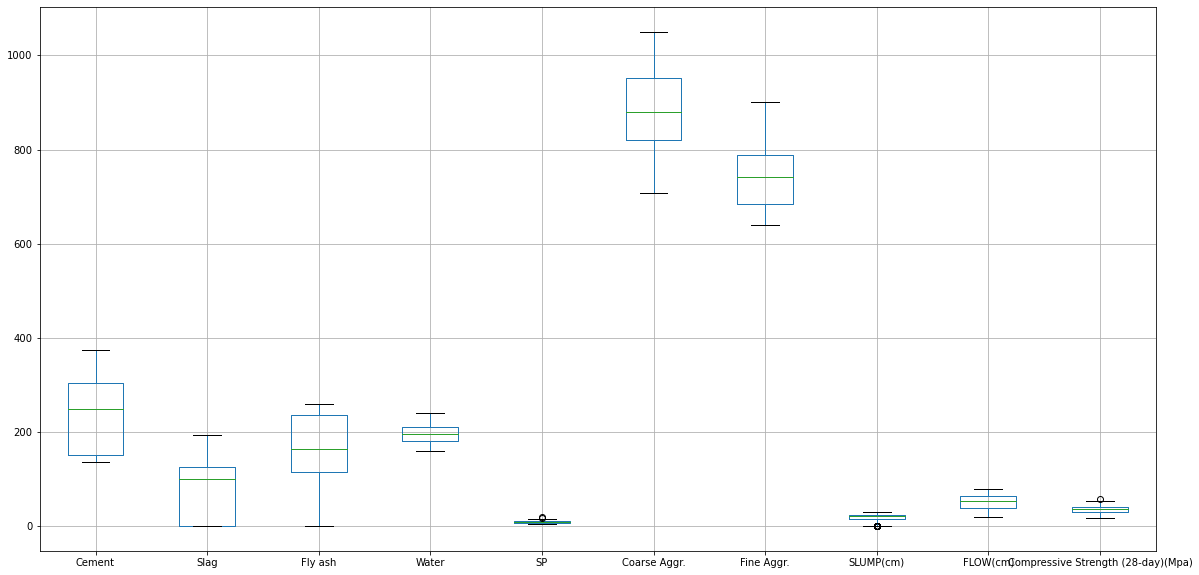

In [14]:
plt.figure(figsize=(20,10))
df.boxplot() # Asagida iki value cok yukarida, scaling yapmam gerekli sanki..

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
df2=df.copy()

In [ ]:
df2.head()

In [17]:
X=df2.drop(columns= "Compressive Strength (28-day)(Mpa)")

In [18]:
X.head(1)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000


In [19]:
y=df2["Compressive Strength (28-day)(Mpa)"]

In [20]:
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test,y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state=60)

In [23]:
df2.sample(15)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
29,314.000,0.000,161.000,207.000,6.000,851.000,757.000,21.500,64.000,41.140
95,184.300,153.400,239.200,179.000,7.500,920.200,640.900,0.000,20.000,41.010
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000,28.160
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
75,149.000,109.000,139.000,193.000,6.000,892.000,780.000,23.500,58.500,28.700
79,141.100,0.600,209.500,188.800,4.600,996.100,789.200,23.500,53.000,30.430
25,140.000,128.000,164.000,183.000,12.000,871.000,775.000,23.750,53.000,33.380
50,320.000,0.000,163.000,188.000,9.000,866.000,776.000,23.500,60.000,45.690
66,160.000,0.000,250.000,168.000,12.000,1049.000,688.000,18.000,48.000,37.660
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000,33.510


In [24]:
print("Train feautures shape : ", X_train.shape)
print("Train target shape : " , y_train.shape)
print("Test feautures shape : ", X_test.shape)
print("Test target shape : " , y_test.shape)

Train feautures shape :  (72, 9)
Train target shape :  (72,)
Test feautures shape :  (31, 9)
Test target shape :  (31,)


In [25]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
8,152.000,0.000,237.000,204.000,6.000,785.000,892.000,15.500,51.000
69,336.000,134.000,0.000,222.000,6.000,756.000,787.000,26.000,64.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000
95,184.300,153.400,239.200,179.000,7.500,920.200,640.900,0.000,20.000
...,...,...,...,...,...,...,...,...,...
15,159.000,116.000,149.000,175.000,15.000,953.000,720.000,23.500,54.500
10,145.000,106.000,136.000,208.000,10.000,751.000,883.000,24.500,61.000
70,276.000,90.000,116.000,180.000,9.000,870.000,768.000,0.000,20.000
65,159.000,0.000,248.000,175.000,12.000,1041.000,683.000,21.000,51.000


In [26]:
X_test

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
52,356.000,142.000,0.000,193.000,11.000,801.000,778.000,8.000,30.000
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
80,140.100,4.200,215.900,193.900,4.700,1049.500,710.100,24.500,57.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
78,140.000,1.400,198.100,174.900,4.400,1049.900,780.500,16.250,31.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
19,296.000,97.000,0.000,219.000,9.000,932.000,685.000,15.000,48.500
30,321.000,0.000,164.000,190.000,5.000,870.000,774.000,24.000,60.000
94,172.800,158.300,239.500,166.400,7.400,952.600,644.100,0.000,20.000
37,165.000,150.000,0.000,182.000,12.000,1023.000,729.000,14.500,20.000


In [27]:
y_train

8    32.710
69   31.900
99   50.230
68   46.360
95   41.010
      ...  
15   34.050
10   26.020
70   44.080
65   35.390
77   34.180
Name: Compressive Strength (28-day)(Mpa), Length: 72, dtype: float64

In [28]:
y_test

52    36.460
4     26.820
80    26.420
14    32.440
78    30.830
3     42.080
19    29.230
30    45.820
94    41.810
37    18.260
21    36.190
71    28.160
25    33.380
22    18.520
55    19.190
13    33.910
58    26.420
91    32.840
29    41.140
28    41.270
66    37.660
48    58.530
90    35.520
83    36.320
75    28.700
35    43.540
82    36.190
79    30.430
56    31.500
102   48.700
16    28.290
Name: Compressive Strength (28-day)(Mpa), dtype: float64

# Data Preprocessing 

### Features and target variable

In [ ]:
# Hizimi alamayip yukarida yapmisim, kusura bakmayin.. Vakit yetisirse düzeltecegim

### Splitting data into training and testing

In [ ]:
# Hizimi alamayip yukarida yapmisim, kusura bakmayin.. Vakit yetisirse düzeltecegim

## Scaling

In [ ]:
# Bu konu bende eksik, bayramda bakmaya firsat olmadi, ilkbakista düzeltecegim ins..

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [30]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[-1.07501921, -1.41187879,  1.03097701,  0.29467762, -0.98796072,
        -1.00901159,  2.30435546, -0.32421518, -0.01345018],
       [ 1.38543628,  0.95606033, -1.92332813,  1.17585483, -0.98796072,
        -1.34582734,  0.7121818 ,  0.84018709,  0.73148311],
       [ 0.2086967 ,  0.37291114,  1.06712673, -1.41382707, -0.32932024,
         0.90619246, -1.45469073, -1.82130382, -1.78982958],
       [ 1.17148363,  0.83236202,  0.12100116,  0.63735765, -0.98796072,
        -1.75232911, -0.25828595, -1.82130382, -1.78982958],
       [-0.6431023 ,  1.29888137,  1.05840094, -0.9291796 , -0.40680735,
         0.56124667, -1.50321411, -2.04309473, -1.78982958],
       [ 0.82381057,  0.46126708, -0.22803067,  0.44154049, -0.98796072,
        -1.45035637,  0.57570978,  0.61839618, -0.24266043],
       [ 0.8652639 , -0.68912722,  1.06712673, -0.19486527, -0.40680735,
         0.43000467, -1.33793132,  1.00653027,  0.90339079],
       [ 1.02439118, -1.41187879, -0.15323813,  0.98003767,  0

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.65287709,  1.09742983, -1.92332813, -0.24381956,  0.94921716,
        -0.82318221,  0.57570978, -1.15593109, -1.21680397],
       [-1.04827513,  0.5672942 , -0.12830729,  1.07794625,  0.56178158,
         0.59376681, -1.24391726,  0.17481436,  0.73148311],
       [-1.2341465 , -1.3376598 ,  0.76795659, -0.1997607 , -1.49162697,
         2.06298035, -0.45389586,  0.67384391,  0.33036518],
       [ 1.89357383, -1.41187879, -1.92332813, -0.39068242, -0.60052514,
         1.63905707, -0.15214104, -0.43511064, -0.50052195],
       [-1.2354837 , -1.38713913,  0.54607207, -1.12989219, -1.60785764,
         2.06762608,  0.61361867, -0.24104359, -1.15950141],
       [-0.94129881,  1.20345695,  0.44510215, -0.9291796 ,  4.04870177,
        -0.39345177,  0.01465811, -1.71040836, -1.70387574],
       [ 0.85055465,  0.30222639, -1.92332813,  1.02899196,  0.17434601,
         0.69829584, -0.83450118, -0.37966291, -0.15670659],
       [ 1.18485567, -1.41187879,  0.12100116, -0.39068242, -1

In [ ]:
#checking std = 1 and mean = 0
#this gives us the z-scores. so it's also called z-score scaling

#These values show where in the normal distribution they correspond to the z score.

In [33]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [34]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [35]:
X_test_scaled = scaler.transform(X_test)
# Data leakege olmamasi icin train degerleriile test datasinda transform yapiyoruz.

##  1. Model Building (Linear Regression)

In [36]:
from sklearn.linear_model import LinearRegression

### 1.1 Interpret the model

In [37]:
model= LinearRegression()

### 1.2 Model Evaluation

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred    # This is actually y_test

array([39.08350594, 27.30266952, 27.44224042, 35.06064553, 27.61178548,
       39.97278516, 27.59188476, 45.18950781, 43.0665419 , 17.23271326,
       41.95900262, 29.93928203, 31.40061122, 20.19035374, 17.55156813,
       28.8839981 , 28.23509335, 35.28698105, 43.47305084, 40.3820366 ,
       39.14920367, 52.26255188, 37.28430916, 32.9153111 , 28.02302815,
       41.545016  , 31.76555051, 27.81445616, 30.33147605, 50.34671296,
       33.88558759])

In [40]:
X_test.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
52,356.000,142.000,0.000,193.000,11.000,801.000,778.000,8.000,30.000
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
80,140.100,4.200,215.900,193.900,4.700,1049.500,710.100,24.500,57.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
78,140.000,1.400,198.100,174.900,4.400,1049.900,780.500,16.250,31.000


In [41]:
y_pred2= model.predict(X_test.head(1))
y_pred2

array([39.08350594])

In [42]:
model.coef_

array([ 0.03623111, -0.06510232,  0.02331929, -0.30148569, -0.04585874,
       -0.08477095, -0.07232644, -0.24028194,  0.08433295])

In [43]:
model.intercept_

217.68471351367208

In [ ]:
# y_pred = a**9 * feauture1 + b**8 * feature2 + .... + c

In [44]:
sum(X_test.loc[52] * model.coef_) + model.intercept_

39.0835059446288

In [45]:
my_dict = {"Actual" : y_test, "Pred" : y_pred, "Residual" : y_test-y_pred}

In [46]:
comparing= pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
52,36.460,39.084,-2.624
4,26.820,27.303,-0.483
80,26.420,27.442,-1.022
14,32.440,35.061,-2.621
78,30.830,27.612,3.218
3,42.080,39.973,2.107
19,29.230,27.592,1.638
30,45.820,45.190,0.630
94,41.810,43.067,-1.257
37,18.260,17.233,1.027


In [47]:
result_sample = comparing.sample(25)
result_sample

,Actual,Pred,Residual
66,37.660,39.149,-1.489
48,58.530,52.263,6.267
35,43.540,41.545,1.995
79,30.430,27.814,2.616
82,36.190,31.766,4.424
28,41.270,40.382,0.888
102,48.700,50.347,-1.647
29,41.140,43.473,-2.333
56,31.500,30.331,1.169
37,18.260,17.233,1.027


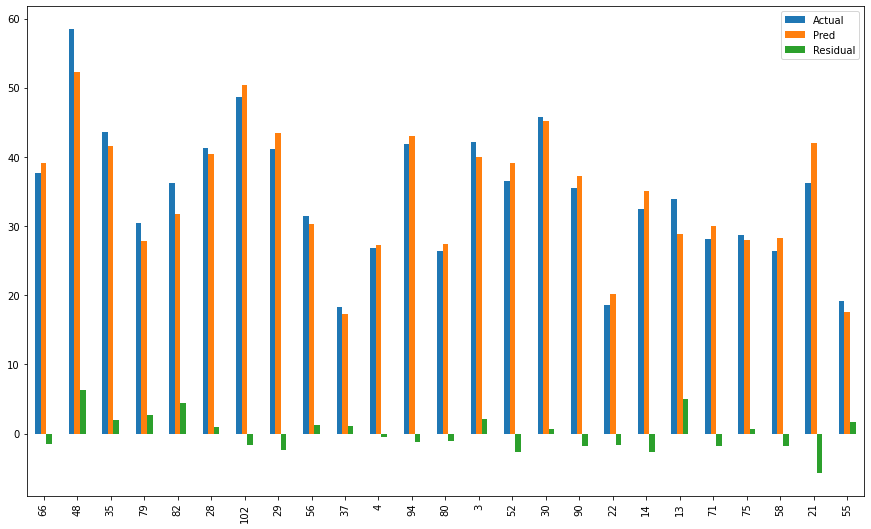

In [48]:
result_sample.plot(kind='bar', figsize = (15,9))
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
R2_score= r2_score(y_test, y_pred)
R2_score

0.8954300114890537

In [51]:
mae= mean_absolute_error(y_test, y_pred)
mae

2.3555129015647926

In [52]:
mse = mean_squared_error(y_test,y_pred)
mse

7.890367068439895

In [53]:
rmse = np.sqrt (mse)
rmse

2.8089797201902145

In [54]:
sonuc_mean = df2["Compressive Strength (28-day)(Mpa)"].mean()
sonuc_mean

36.03873786407767

In [55]:
mae / sonuc_mean

0.06536058256115282

In [56]:
mse / sonuc_mean

0.21894127086800053

In [57]:
rmse / sonuc_mean

0.07794334337635395

In [ ]:
# rmse ve mae yakin, outlier'lar cok asiri degil

In [58]:
def adj_r2(y_test, y_pred, df2):
    r2 = r2_score(y_test, y_pred)
    n = df2.shape[0]   # number of observations
    p = df2.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [59]:
adj_r2(y_test, y_pred, df)

0.8853103351815428

In [ ]:
# adj_r2= R2'in düzenlenmis hali'.  R2'ye yakin, demek ki feauture"lar anlamli.

In [60]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
#R2_score = r2_score(actual, pred)

In [61]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8954300114890537
MAE 		: 2.3555129015647926
MSE 		: 7.890367068439895
RMSE 		: 2.8089797201902145


In [62]:
y_train_pred = model.predict (X_train)

In [63]:
eval_metric (y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9098917639970848
MAE 		: 1.7270001060952167
MSE 		: 4.700807442532426
RMSE 		: 2.1681345536041867


In [64]:
residuals = y_test-y_pred

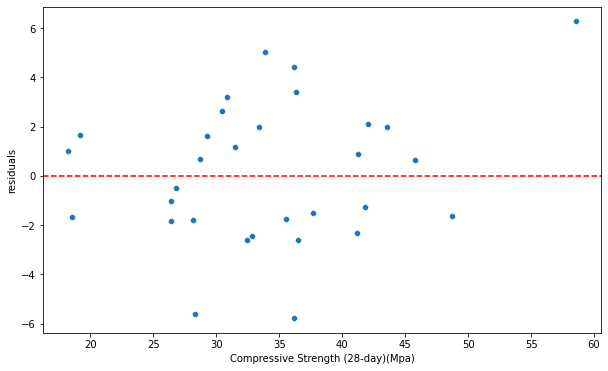

In [65]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

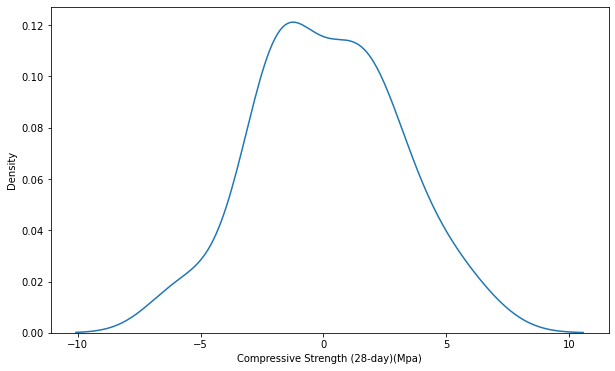

In [66]:
sns.kdeplot(residuals)

In [ ]:
# Normal Distrubution a yakin.

In [67]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


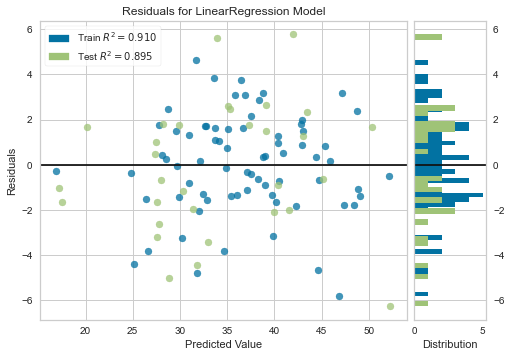

In [68]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

In [ ]:
# calismadi (?) - belki programi resetleyince calisir

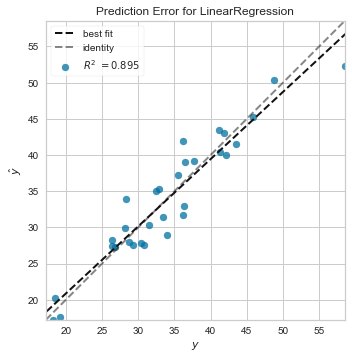

In [69]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [ ]:
# prediction error for lineer regression - Yellowbrick yukarida yine calismadi.- belki programi resetleyince calisir

In [70]:
final_model = LinearRegression()

In [71]:
final_model.fit(X,y)

LinearRegression()

In [72]:
final_model.coef_

array([ 0.05910669, -0.03249564,  0.04662923, -0.23404568,  0.03356713,
       -0.05502398, -0.03813689, -0.23609793,  0.08472995])

In [73]:
final_model.intercept_

140.79945020900948

In [74]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [75]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [76]:
coeff_df

,Coefficient
Cement,0.059
Slag,-0.032
Fly ash,0.047
Water,-0.234
SP,0.034
Coarse Aggr.,-0.055
Fine Aggr.,-0.038
SLUMP(cm),-0.236
FLOW(cm),0.085


In [ ]:
# Water and Slump have the best effect on target

In [ ]:
# Cross_Validation

In [ ]:
# We do cross-validation to check whether the one-time scores we receive are consistent or not

# cross validation is only applied to the train set.

In [77]:
from sklearn.metrics import SCORERS

In [78]:
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [79]:
from sklearn.model_selection import cross_validate, cross_val_score

In [80]:
model2 = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [81]:
scores

{'fit_time': array([0.00380802, 0.00099778, 0.0030055 , 0.00099444, 0.0009973 ]),
 'score_time': array([0.00199437, 0.00199342, 0.00397897, 0.00199723, 0.00199318]),
 'test_r2': array([0.80832667, 0.93814238, 0.82797947, 0.88327491, 0.77289718]),
 'test_neg_mean_absolute_error': array([-2.19695197, -1.45271879, -2.40427008, -2.05180334, -2.20762598]),
 'test_neg_mean_squared_error': array([-8.62414176, -3.49423421, -9.1720454 , -6.71188029, -6.95754153]),
 'test_neg_root_mean_squared_error': array([-2.93668891, -1.86928709, -3.02853849, -2.59072968, -2.63771521])}

In [82]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004,0.002,0.808,-2.197,-8.624,-2.937
2,0.001,0.002,0.938,-1.453,-3.494,-1.869
3,0.003,0.004,0.828,-2.404,-9.172,-3.029
4,0.001,0.002,0.883,-2.052,-6.712,-2.591
5,0.001,0.002,0.773,-2.208,-6.958,-2.638


In [83]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean() # r2'yi maksimize digerlerini minimize etmeye calistigim icin, neg_mSE secersem onlarin r2 yükselirken sifira yakinsamasi daha kolay..

test_r2                             0.846
test_neg_mean_absolute_error       -2.063
test_neg_mean_squared_error        -6.992
test_neg_root_mean_squared_error   -2.613
dtype: float64

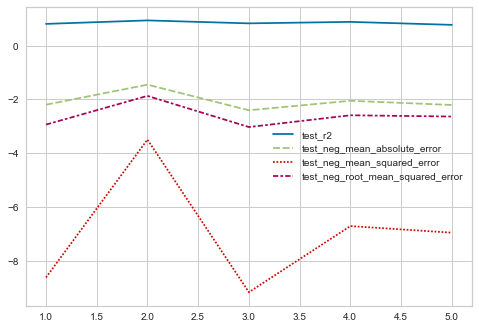

In [84]:
sns.lineplot(data = scores.iloc[:,2:]);

In [94]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    scores = {model_name+'_train': {'R2' : r2_score(y_train,y_train_pred),
                'mae': mean_absolute_error(y_train,y_train_pred),
                'mse': mean_squared_error(y_train,y_train_pred),
                'rmse': np.sqrt(mean_squared_error(y_train,y_train_pred))},
        model_name+'_test': {'R2' : r2_score(y_train,y_pred),
                'mae': mean_absolute_error(y_train,y_pred),
                'mse': mean_squared_error(y_train,y_pred),
                'rmse': np.sqrt(mean_squared_error(y_train,y_pred))}}
    return pd-DataFrame(scores)

In [95]:
train_val(y_train, y_train_pred, y_test, y_pred, "model2")

ValueError: Found input variables with inconsistent numbers of samples: [72, 31]

In [ ]:
print('train RMSE:', 2.42)

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [ ]:
#Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting.

In [97]:
from sklearn.linear_model import Ridge

In [98]:
ridge_model = Ridge(alpha=1, random_state=60)   # I"m from Tokat :)

In [99]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=60)

In [100]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [101]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.907,0.899
mae,1.770,2.212
mse,4.847,7.622
rmse,2.202,2.761


In [104]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.899,0.907,0.899
mae,1.770,2.212,1.770,2.212
mse,4.847,7.622,4.847,7.622
rmse,2.202,2.761,2.202,2.761


In [105]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [106]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [103]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result.
ls

,linear_train,linear_test
R2,0.907,0.899
mae,1.770,2.212
mse,4.847,7.622
rmse,2.202,2.761


In [108]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.910,0.895
mae,1.727,2.356
mse,4.701,7.890
rmse,2.168,2.809


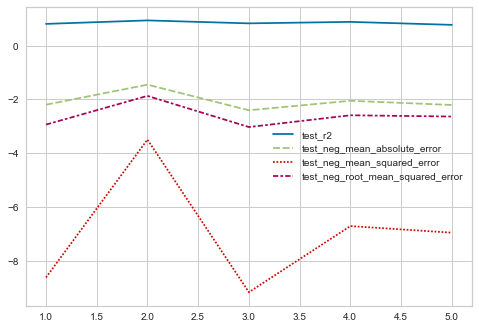

In [109]:
sns.lineplot(data = scores.iloc[:,2:]);

In [111]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.910,0.895
mae,1.727,2.356
mse,4.701,7.890
rmse,2.168,2.809


In [112]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.899,0.910,0.895
mae,1.770,2.212,1.727,2.356
mse,4.847,7.622,4.701,7.890
rmse,2.202,2.761,2.168,2.809


In [ ]:
# For Ridge Regression CV with alpha : 1

In [113]:
model = Ridge(alpha=1, random_state=60)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [114]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.002,0.833,-2.092,-7.509,-2.740
2,0.002,0.002,0.941,-1.339,-3.307,-1.819
3,0.002,0.004,0.830,-2.401,-9.053,-3.009
4,0.002,0.002,0.867,-2.208,-7.671,-2.770
5,0.001,0.002,0.804,-2.242,-6.019,-2.453


In [115]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.855
test_neg_mean_absolute_error       -2.056
test_neg_mean_squared_error        -6.712
test_neg_root_mean_squared_error   -2.558
dtype: float64

<AxesSubplot:>

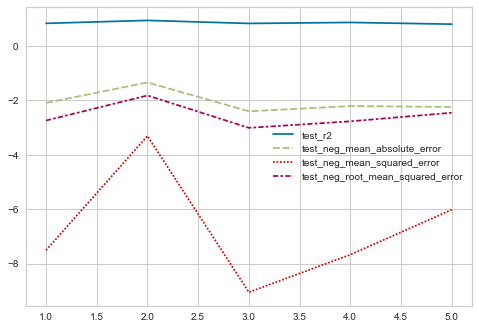

In [116]:
sns.lineplot(data = scores.iloc[:,2:])

In [117]:
ridge_model.coef_

array([ 4.93345732, -1.29486954,  4.37251296, -3.71807707,  0.26263225,
       -3.83927359, -2.04921866, -1.51260049,  0.58731262])

In [118]:
rm_df2 = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [119]:
lm_df2 = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df2

,lm_coef
0,2.709
1,-3.684
2,1.871
3,-6.159
4,-0.118
5,-7.299
6,-4.770
7,-2.167
8,1.472


In [120]:
pd.concat([lm_df2,rm_df2], axis = 1)

,lm_coef,ridge_coef_1
0,2.709,4.933
1,-3.684,-1.295
2,1.871,4.373
3,-6.159,-3.718
4,-0.118,0.263
5,-7.299,-3.839
6,-4.770,-2.049
7,-2.167,-1.513
8,1.472,0.587


In [ ]:
#Choosing best alpha value with Cross-Validation

In [121]:
from sklearn.linear_model import RidgeCV

In [122]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [123]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [124]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [125]:
ridge_cv_model.alpha_ #Ridge(alpha=1) alpha büyüdükce regularization büyür.

1.0

In [126]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-2.558124732351171

In [127]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [128]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.907,0.899
mae,1.770,2.212
mse,4.847,7.622
rmse,2.202,2.761


In [129]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907,0.899,0.910,0.895,0.907,0.899
mae,1.770,2.212,1.727,2.356,1.770,2.212
mse,4.847,7.622,4.701,7.890,4.847,7.622
rmse,2.202,2.761,2.168,2.809,2.202,2.761


In [130]:
ridge_cv_model.coef_

array([ 4.93345732, -1.29486954,  4.37251296, -3.71807707,  0.26263225,
       -3.83927359, -2.04921866, -1.51260049,  0.58731262])

In [131]:
rcm_df2 = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [132]:
pd.concat([lm_df2,rm_df2, rcm_df2], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02
0,2.709,4.933,4.933
1,-3.684,-1.295,-1.295
2,1.871,4.373,4.373
3,-6.159,-3.718,-3.718
4,-0.118,0.263,0.263
5,-7.299,-3.839,-3.839
6,-4.770,-2.049,-2.049
7,-2.167,-1.513,-1.513
8,1.472,0.587,0.587


## 2.2 Lasso (Apply and evalute)

In [133]:
from sklearn.linear_model import Lasso, LassoCV

In [134]:
lasso_model = Lasso(alpha=1, random_state=60)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=60)

In [135]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [136]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.760,0.702
mae,2.837,3.830
mse,12.522,22.449
rmse,3.539,4.738


In [137]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907,0.899,0.910,0.895,0.907,0.899,0.760,0.702
mae,1.770,2.212,1.727,2.356,1.770,2.212,2.837,3.830
mse,4.847,7.622,4.701,7.890,4.847,7.622,12.522,22.449
rmse,2.202,2.761,2.168,2.809,2.202,2.761,3.539,4.738


In [ ]:
# For Lasso CV with Default Alpha : 1. Burada lasso da underfitting gördük,cünkü skorlarimiz kötülesti.

In [138]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [139]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003,0.004,0.663,-2.817,-15.155,-3.893
2,0.002,0.001,0.731,-3.271,-15.173,-3.895
3,0.001,0.001,0.694,-2.985,-16.342,-4.043
4,0.001,0.002,0.656,-3.819,-19.769,-4.446
5,0.001,0.003,0.787,-2.278,-6.519,-2.553


In [140]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.706
test_neg_mean_absolute_error        -3.034
test_neg_mean_squared_error        -14.591
test_neg_root_mean_squared_error    -3.766
dtype: float64

In [141]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.760,0.702
mae,2.837,3.830
mse,12.522,22.449
rmse,3.539,4.738


<AxesSubplot:>

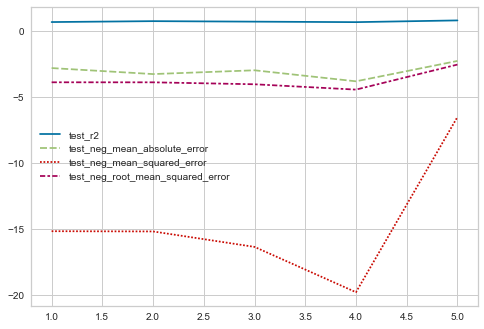

In [142]:
sns.lineplot(data = scores.iloc[:,2:])

In [143]:
lasso_model.coef_

array([ 4.45143999, -0.        ,  4.18064506, -0.44051547,  0.        ,
       -0.        , -0.        , -0.88288264, -0.        ])

In [144]:
lsm_df2 = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [145]:
pd.concat([lm_df2, rm_df2, rcm_df2, lsm_df2], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,2.709,4.933,4.933,4.451
1,-3.684,-1.295,-1.295,-0.000
2,1.871,4.373,4.373,4.181
3,-6.159,-3.718,-3.718,-0.441
4,-0.118,0.263,0.263,0.000
5,-7.299,-3.839,-3.839,-0.000
6,-4.770,-2.049,-2.049,-0.000
7,-2.167,-1.513,-1.513,-0.883
8,1.472,0.587,0.587,-0.000


In [ ]:
# Choosing best alpha value with Cross-Validation

In [146]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=60) 

In [147]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=60)

In [148]:
lasso_cv_model.alpha_

0.06999999999999999

In [149]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([93], dtype=int64),)

In [150]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [151]:
#mse score for CV
lasso_cv_model.mse_path_[99].mean()

6.908762606092685

In [152]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.0699)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [153]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.903,0.895
mae,1.820,2.181
mse,5.041,7.908
rmse,2.245,2.812


In [154]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907,0.899,0.910,0.895,0.907,0.899,0.760,0.702,0.903,0.895
mae,1.770,2.212,1.727,2.356,1.770,2.212,2.837,3.830,1.820,2.181
mse,4.847,7.622,4.701,7.890,4.847,7.622,12.522,22.449,5.041,7.908
rmse,2.202,2.761,2.168,2.809,2.202,2.761,3.539,4.738,2.245,2.812


In [155]:
lasso_cv_model.coef_

array([ 6.20098969,  0.        ,  5.80217   , -2.41945128,  0.42273564,
       -1.97958092, -0.53748244, -1.02567184, -0.        ])

In [156]:
lcm_df2 = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [157]:
pd.concat([lm_df2, rm_df2, rcm_df2, lsm_df2, lcm_df2], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,2.709,4.933,4.933,4.451,6.201
1,-3.684,-1.295,-1.295,-0.000,0.000
2,1.871,4.373,4.373,4.181,5.802
3,-6.159,-3.718,-3.718,-0.441,-2.419
4,-0.118,0.263,0.263,0.000,0.423
5,-7.299,-3.839,-3.839,-0.000,-1.980
6,-4.770,-2.049,-2.049,-0.000,-0.537
7,-2.167,-1.513,-1.513,-0.883,-1.026
8,1.472,0.587,0.587,-0.000,-0.000


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [158]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [159]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=60) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=60)

In [160]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [161]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.615,0.505
mae,3.640,4.981
mse,20.108,37.322
rmse,4.484,6.109


In [162]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907,0.899,0.910,0.895,0.907,0.899,0.760,0.702,0.903,0.895,0.615,0.505
mae,1.770,2.212,1.727,2.356,1.770,2.212,2.837,3.830,1.820,2.181,3.640,4.981
mse,4.847,7.622,4.701,7.890,4.847,7.622,12.522,22.449,5.041,7.908,20.108,37.322
rmse,2.202,2.761,2.168,2.809,2.202,2.761,3.539,4.738,2.245,2.812,4.484,6.109


In [ ]:
# For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [163]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [164]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.436,-3.806,-25.368,-5.037
2,0.527,-4.002,-26.700,-5.167
3,0.537,-4.088,-24.662,-4.966
4,0.533,-4.480,-26.850,-5.182
5,0.599,-3.052,-12.274,-3.503


In [165]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.527
test_neg_mean_absolute_error        -3.886
test_neg_mean_squared_error        -23.171
test_neg_root_mean_squared_error    -4.771
dtype: float64

In [166]:
elastic_model.coef_

array([ 2.52256916, -0.67740625,  2.21457305, -0.734619  ,  0.        ,
       -0.5048622 , -0.56777611, -0.75126947, -0.34886145])

In [167]:
em_df2 = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [168]:
pd.concat([lm_df2, rm_df2, rcm_df2, lsm_df2, lcm_df2, em_df2], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,2.709,4.933,4.933,4.451,6.201,2.523
1,-3.684,-1.295,-1.295,-0.000,0.000,-0.677
2,1.871,4.373,4.373,4.181,5.802,2.215
3,-6.159,-3.718,-3.718,-0.441,-2.419,-0.735
4,-0.118,0.263,0.263,0.000,0.423,0.000
5,-7.299,-3.839,-3.839,-0.000,-1.980,-0.505
6,-4.770,-2.049,-2.049,-0.000,-0.537,-0.568
7,-2.167,-1.513,-1.513,-0.883,-1.026,-0.751
8,1.472,0.587,0.587,-0.000,-0.000,-0.349


In [ ]:
#Choosing best alpha and l1_ratio values with Cross-Validation

In [169]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=60)

In [170]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=60)

In [171]:
elastic_cv_model.alpha_   #Best alpha 

0.06999999999999999

In [172]:
elastic_cv_model.l1_ratio_

0.95

In [173]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

6.908762606092685

In [174]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [175]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.903,0.895
mae,1.824,2.182
mse,5.052,7.949
rmse,2.248,2.819


In [176]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.907,0.899,0.910,0.895,0.907,0.899,0.760,0.702,0.903,0.895,0.615,0.505,0.903,0.895
mae,1.770,2.212,1.727,2.356,1.770,2.212,2.837,3.830,1.820,2.181,3.640,4.981,1.824,2.182
mse,4.847,7.622,4.701,7.890,4.847,7.622,12.522,22.449,5.041,7.908,20.108,37.322,5.052,7.949
rmse,2.202,2.761,2.168,2.809,2.202,2.761,3.539,4.738,2.245,2.812,4.484,6.109,2.248,2.819


In [177]:
elastic_cv_model.coef_

array([ 6.15750771, -0.        ,  5.75832938, -2.42070019,  0.41579605,
       -1.98799236, -0.55748521, -1.02448424, -0.        ])

In [178]:
ecm_df2 = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.06999999999999999, l1:0.95)"])

In [179]:
pd.concat([lm_df2, rm_df2, rcm_df2, lsm_df2, lcm_df2, em_df2, ecm_df2], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.06999999999999999, l1:0.95)"
0,2.709,4.933,4.933,4.451,6.201,2.523,6.158
1,-3.684,-1.295,-1.295,-0.000,0.000,-0.677,-0.000
2,1.871,4.373,4.373,4.181,5.802,2.215,5.758
3,-6.159,-3.718,-3.718,-0.441,-2.419,-0.735,-2.421
4,-0.118,0.263,0.263,0.000,0.423,0.000,0.416
5,-7.299,-3.839,-3.839,-0.000,-1.980,-0.505,-1.988
6,-4.770,-2.049,-2.049,-0.000,-0.537,-0.568,-0.557
7,-2.167,-1.513,-1.513,-0.883,-1.026,-0.751,-1.024
8,1.472,0.587,0.587,-0.000,-0.000,-0.349,-0.000


In [ ]:
# Let's make all for Grid search..

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
elastic_model = ElasticNet(max_iter=10000, random_state=60)

In [182]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [183]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [184]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=60),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
#pc hizlidir, sirf bu kurs icin aldim, Allah  zeval vermesin..

In [185]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.1}

In [186]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003,0.001,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.774,-1.849,-3.037,-2.714,-2.482,-2.571,0.402,2
1,0.003,0.000,0.001,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.790,-1.865,-3.056,-2.689,-2.496,-2.579,0.400,4
2,0.003,0.001,0.001,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.804,-1.873,-3.067,-2.674,-2.504,-2.584,0.400,6
3,0.004,0.002,0.001,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.825,-1.878,-3.077,-2.658,-2.518,-2.591,0.402,8
4,0.004,0.001,0.001,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.832,-1.878,-3.080,-2.652,-2.525,-2.594,0.403,10
5,0.006,0.002,0.001,0.001,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.840,-1.878,-3.082,-2.648,-2.534,-2.596,0.404,12
6,0.004,0.001,0.001,0.001,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.842,-1.878,-3.082,-2.647,-2.537,-2.597,0.405,14
7,0.003,0.001,0.001,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.761,-1.842,-3.031,-2.728,-2.474,-2.567,0.403,1
8,0.002,0.000,0.001,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.774,-1.861,-3.055,-2.699,-2.489,-2.575,0.401,3
9,0.002,0.000,0.000,0.001,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.786,-1.871,-3.068,-2.684,-2.498,-2.581,0.400,5


In [187]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003,0.001,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.774,-1.849,-3.037,-2.714,-2.482,-2.571,0.402,2
1,0.003,0.000,0.001,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.790,-1.865,-3.056,-2.689,-2.496,-2.579,0.400,4
2,0.003,0.001,0.001,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.804,-1.873,-3.067,-2.674,-2.504,-2.584,0.400,6
3,0.004,0.002,0.001,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.825,-1.878,-3.077,-2.658,-2.518,-2.591,0.402,8
4,0.004,0.001,0.001,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.832,-1.878,-3.080,-2.652,-2.525,-2.594,0.403,10
5,0.006,0.002,0.001,0.001,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.840,-1.878,-3.082,-2.648,-2.534,-2.596,0.404,12
6,0.004,0.001,0.001,0.001,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.842,-1.878,-3.082,-2.647,-2.537,-2.597,0.405,14
7,0.003,0.001,0.001,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.761,-1.842,-3.031,-2.728,-2.474,-2.567,0.403,1
8,0.002,0.000,0.001,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.774,-1.861,-3.055,-2.699,-2.489,-2.575,0.401,3
9,0.002,0.000,0.000,0.001,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.786,-1.871,-3.068,-2.684,-2.498,-2.581,0.400,5


In [188]:
grid_model.best_index_

7

In [189]:
grid_model.best_score_

-2.5670645611645244

In [ ]:
# Using Best Hyper Parameters From GridSearch

In [190]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [191]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.907,0.900
mae,1.762,2.212
mse,4.827,7.571
rmse,2.197,2.751


In [ ]:
# Final Model

In [192]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

NameError: name 'poly_features' is not defined

In [ ]:
# I need a Polynomial Conversion

In [193]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# We create an artificial overfiting situation by taking poly feature from 5 degrees

In [194]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [195]:
poly_features.shape

(103, 2001)

In [196]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [197]:
final_model = Lasso(alpha=0.07) #lasso_cv_model

In [198]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.07)

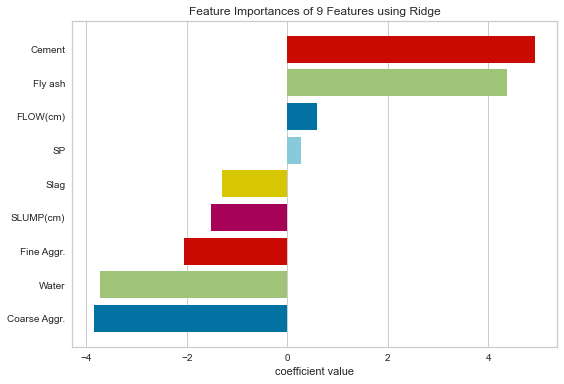

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [205]:
from yellowbrick.model_selection import FeatureImportances
model = Ridge(alpha=ridge_cv_model.alpha_)
viz = FeatureImportances(model, labels=list(X.columns), relative =False)
viz.fit(X_train_scaled, y_train)
viz.show()

In [204]:
from yellowbrick.model_selection import FeatureImportances

In [201]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [203]:
conda install yellowbrick

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




PackagesNotFoundError: The following packages are not available from current channels:

  - yellowbrick

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


